REF : https://github.com/ryuichiueda/probrobo2017/blob/master/03.ipynb

In [1]:
import numpy as np
from copy import copy
import math, random
import matplotlib.pyplot as plt                   #   for plotting data
from matplotlib.patches import Ellipse      #  for drawing

# 実際の世界のシミュレーション
actual_x = np.array([0.0,0.0,0.0])   #ロボットの実際の姿勢
u = np.array([0.2,math.pi / 180.0 * 20]) #ロボットの移動

# モンテカルロ法のための変数
class Particle:
    def __init__(self,w):
        self.pose = np.array([0.0,0.0,0.0])
        self.weight = w
    
    def __repr__(self):
        return "pose: " + str(self.pose) + " weight: " + str(self.weight)
        
particles = [Particle(1.0/100) for i in range(100)]

In [2]:
# 何個かprint
for i in range(5):
    print(particles[i])

pose: [ 0.  0.  0.] weight: 0.01
pose: [ 0.  0.  0.] weight: 0.01
pose: [ 0.  0.  0.] weight: 0.01
pose: [ 0.  0.  0.] weight: 0.01
pose: [ 0.  0.  0.] weight: 0.01


In [3]:
#ロボットとパーティクルを動かす関数
def f(x_old,u):
    pos_x, pos_y, pos_theta = x_old
    act_fw, act_rot = u
    
    act_fw = random.gauss(act_fw,act_fw/10)
    dir_error = random.gauss(0.0, math.pi / 180.0 * 3.0)
    act_rot = random.gauss(act_rot,act_rot/10)
    
    pos_x += act_fw * math.cos(pos_theta + dir_error)
    pos_y += act_fw * math.sin(pos_theta + dir_error)
    pos_theta += act_rot
    
    return np.array([pos_x,pos_y,pos_theta])

In [4]:
import copy

path = [actual_x]
particle_path = [copy.deepcopy(particles)]
for i in range(10):
    actual_x = f(actual_x,u)
    path.append(actual_x)
    
    for p in particles:
        p.pose = f(p.pose,u)
    particle_path.append(copy.deepcopy(particles))

In [5]:
print(path[0])
print(particle_path[0])

[ 0.  0.  0.]
[pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01, pose: [ 0.  0.  0.] weight: 0.01,

In [6]:
print(path[10])
print(particle_path[10])

[-0.01747186  1.12455325  3.64185946]
[pose: [ 0.05991493  1.18574234  3.48065224] weight: 0.01, pose: [-0.04935794  1.08383141  3.65992432] weight: 0.01, pose: [-0.02257926  1.15366168  3.53194624] weight: 0.01, pose: [-0.02658454  1.0829745   3.60813352] weight: 0.01, pose: [ 0.02617658  1.16027509  3.44327256] weight: 0.01, pose: [-0.10506422  1.07372177  3.5614302 ] weight: 0.01, pose: [ 0.03056402  1.18061652  3.2302296 ] weight: 0.01, pose: [ 0.04717697  1.07859874  3.52209776] weight: 0.01, pose: [ 0.0800406   1.20727075  3.38412334] weight: 0.01, pose: [ 0.05475243  1.05230172  3.38476446] weight: 0.01, pose: [-0.04765795  1.050917    3.47331856] weight: 0.01, pose: [-0.15210939  1.02279854  3.69231139] weight: 0.01, pose: [ 0.05387263  1.17652428  3.39158298] weight: 0.01, pose: [ 0.15327981  1.18139506  3.470949  ] weight: 0.01, pose: [ 0.07541565  1.07262672  3.57290868] weight: 0.01, pose: [-0.0862671   0.98122255  3.78042072] weight: 0.01, pose: [ 0.27276635  1.25854945  3

In [7]:
def draw(pose,particles):    
    fig = plt.figure(i,figsize=(8, 8))
    sp = fig.add_subplot(111, aspect='equal')
    sp.set_xlim(-1.0,1.0)
    sp.set_ylim(-0.5,1.5)
    
    xs = [e.pose[0] for e in particles]
    ys = [e.pose[1] for e in particles]
    vxs = [math.cos(e.pose[2]) for e in particles]
    vys = [math.sin(e.pose[2]) for e in particles]
    plt.quiver(xs,ys,vxs,vys,color="blue",label="particles")
    
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red",label="actual robot motion")
    plt.show()

In [8]:
def motion_update():
    for i,p in enumerate(path):
        draw(path[i],particle_path[i])

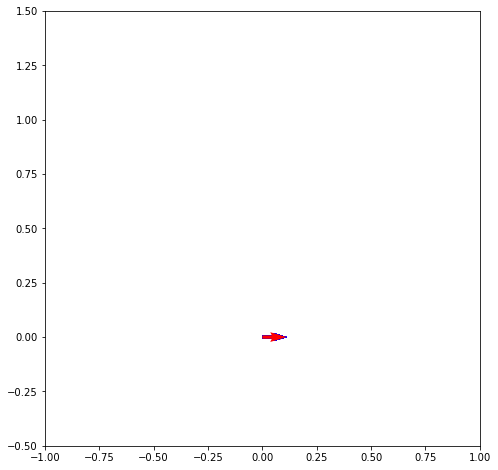

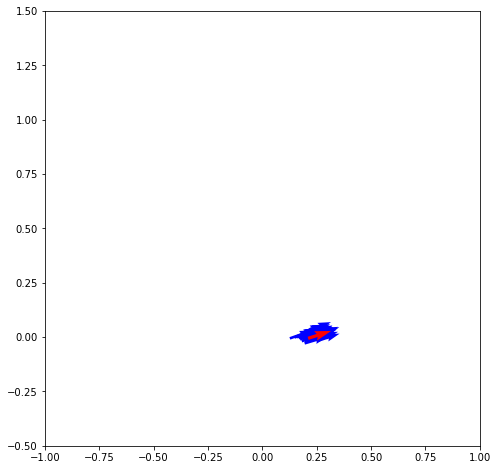

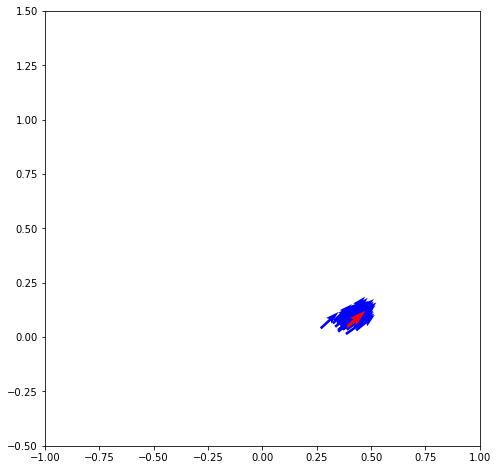

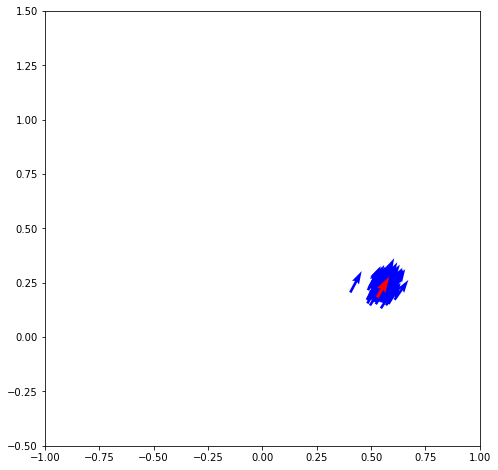

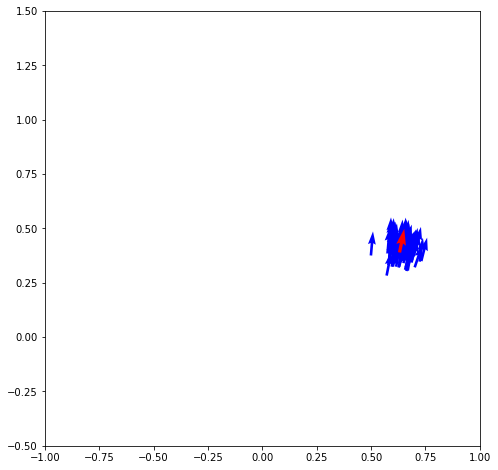

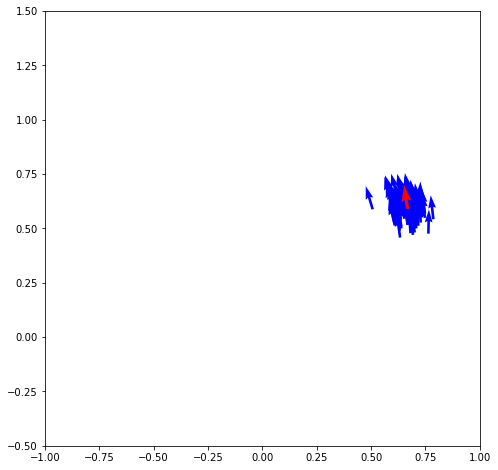

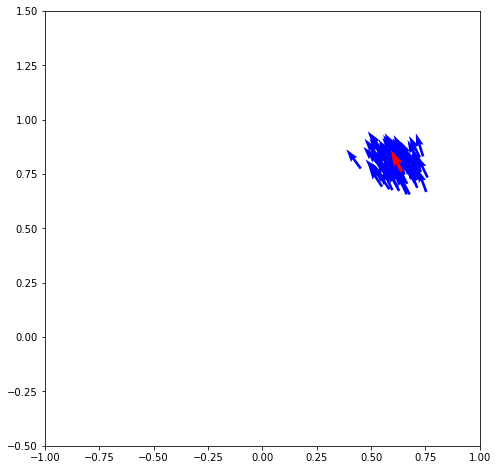

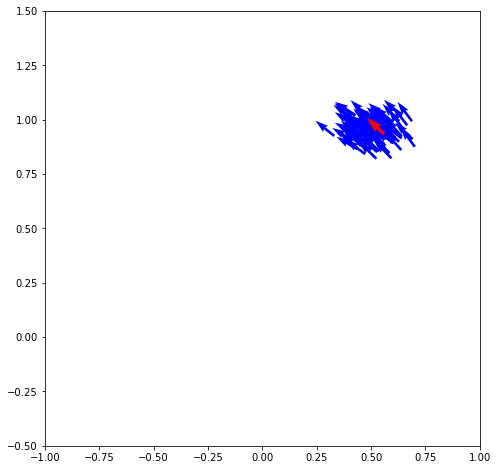

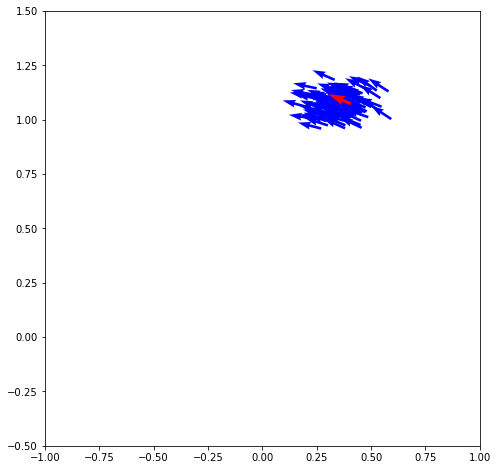

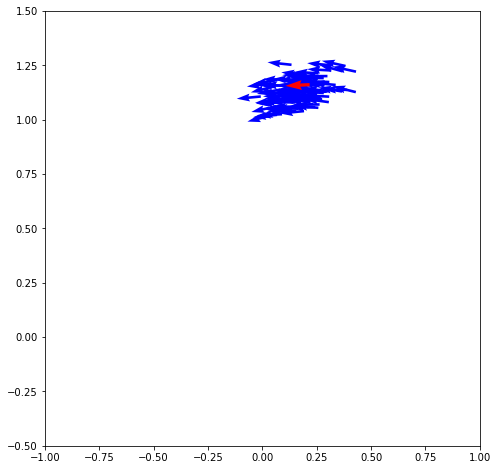

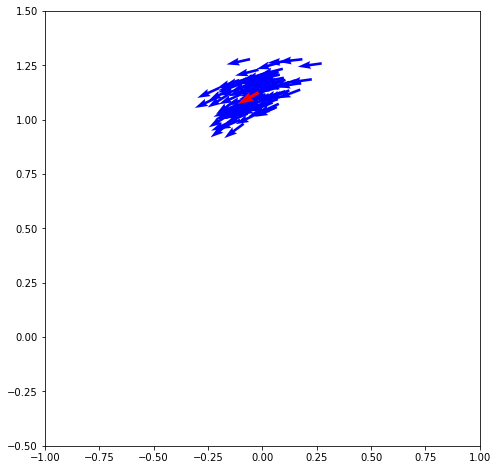

In [9]:
motion_update()